In [1]:
#Importing required libraries
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 

In [2]:
#Reading csv file of dataset stored in local machine using pandas
df = pd.read_csv(r'C:\Users\Neeraj Chaudhari\Downloads\ML Jupyter\archive (1)\UserCarData.csv')

# Data Engineering

In [3]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [4]:
df.shape

(7906, 18)

#### Dataset has 7906 records with 18 variables


In [5]:
print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['Region'].unique())
print(df['name'].unique())
print(df['seats'].unique())

['Individual' 'Dealer' 'Trustmark_Dealer']
['Diesel' 'Petrol' 'LPG' 'CNG']
['Manual' 'Automatic']
['First_Owner' 'Second_Owner' 'Third_Owner' 'Fourth_Above_Owner'
 'Test_Drive_Car']
['East' 'Central' 'West' 'South']
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
[ 5  4  7  8  6  9 10 14  2]


#### Above are all the unique values present in the categorical variable present in the dataset

In [6]:
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

#### Dataset has no null values present

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_ID,7906.0,4070.106248,2345.770159,1.0,2037.25,4076.5,6102.00,8128.0
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.00,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.00,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.00,2360457.0
mileage,7906.0,19.419861,4.036263,0.0,16.78,19.3,22.32,42.0
engine,7906.0,1458.708829,503.893057,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7906.0,91.587374,35.747216,32.8,68.05,82.0,102.00,400.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.00,14.0


#### Some common stats of the numerical variable are mentioned above

#### Dropping Sales_ID column from the dataset as this variable dosent make any difference because ID are different for every record

In [8]:
df.drop('Sales_ID',inplace=True,axis=1)

#### Label Encoding categorical variables into unique numerical values for every unique categorical values 
#### For Label Encoding we use sklearn library 

In [9]:
df1 = df.copy(deep=True)

In [10]:
object_columns = df1.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder
object_columns = object_columns.apply(LabelEncoder().fit_transform)
object_columns.head()

for x in object_columns.columns:
    df1[x]=object_columns[x]
df1.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,20,2014,450000,145500,1,7,1223,1,1,1,0,23.40,1248,74.00,178,5,1
1,26,2014,370000,120000,1,30,786,1,1,1,2,21.14,1498,103.52,260,5,1
2,10,2006,158000,140000,0,11,193,3,1,1,4,17.70,1497,78.00,66,5,1
3,11,2010,225000,127000,0,11,193,1,1,1,0,23.00,1396,90.00,224,5,1
4,20,2007,130000,120000,1,30,786,3,1,1,0,16.10,1298,88.20,21,5,1


In [11]:
df2 = df1.copy(deep=True)

#### As we can see the values of all the variables are varying a lot.

#### So we can perform scaling so that all the variables comes in a standard unit

In [12]:
y = df1.iloc[ : , -1]
df1 = df1.iloc[ : , : -1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: sold, dtype: int32

In [13]:
df1.dtypes

name                   int32
year                   int64
selling_price          int64
km_driven              int64
Region                 int32
State or Province      int32
City                   int32
fuel                   int32
seller_type            int32
transmission           int32
owner                  int32
mileage              float64
engine                 int64
max_power            float64
torque                 int32
seats                  int64
dtype: object

In [14]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
num_columns = df1.select_dtypes(include=['float64','int64','int32'])
scaled_data = scale.fit_transform(num_columns) 
num_columns = pd.DataFrame(scaled_data, columns = num_columns.columns)
for x in num_columns.columns:
    df1[x]=num_columns[x]
df1.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0.318278,0.004158,-0.245613,1.343777,-0.348458,-1.028573,1.539086,-0.887058,0.277395,0.389408,-0.655358,0.986157,-0.418188,-0.492024,-0.295350,-0.434128
1,1.166997,0.004158,-0.343950,0.894744,-0.348458,0.564667,0.365996,-0.887058,0.277395,0.389408,1.003442,0.426198,0.077980,0.333827,0.337124,-0.434128
2,-1.096253,-2.066530,-0.604542,1.246926,-1.211797,-0.751487,-1.225863,1.110117,0.277395,0.389408,2.662242,-0.426129,0.075995,-0.380120,-1.159217,-0.434128
3,-0.954799,-1.031186,-0.522185,1.018008,-1.211797,-0.751487,-1.225863,-0.887058,0.277395,0.389408,-0.655358,0.887050,-0.124457,-0.044408,0.059452,-0.434128
4,0.318278,-1.807694,-0.638960,0.894744,-0.348458,0.564667,0.365996,1.110117,0.277395,0.389408,-0.655358,-0.822561,-0.318955,-0.094765,-1.506306,-0.434128


# Data Visualization (Analysis of Variables)

#### Using seaborn library, plotting boxplot of all the varaibles in the dataset which will help us know the outliers present 

<AxesSubplot:>

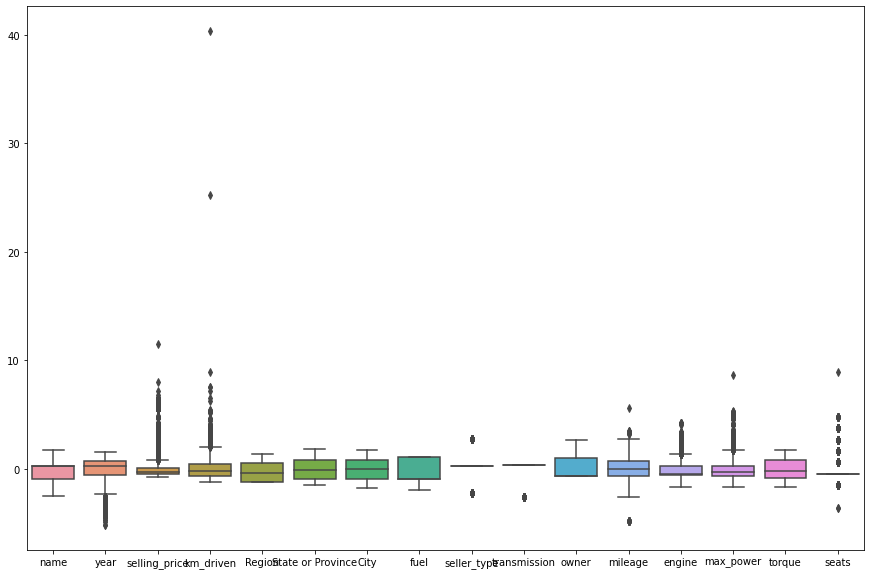

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df1)

#### As we know by boxplot we can get about outliers present in the variables but looking at the variables we cannot delete the outliers because i think these outliers can be real values recorded as these variables can have higher values too

<AxesSubplot:xlabel='name', ylabel='count'>

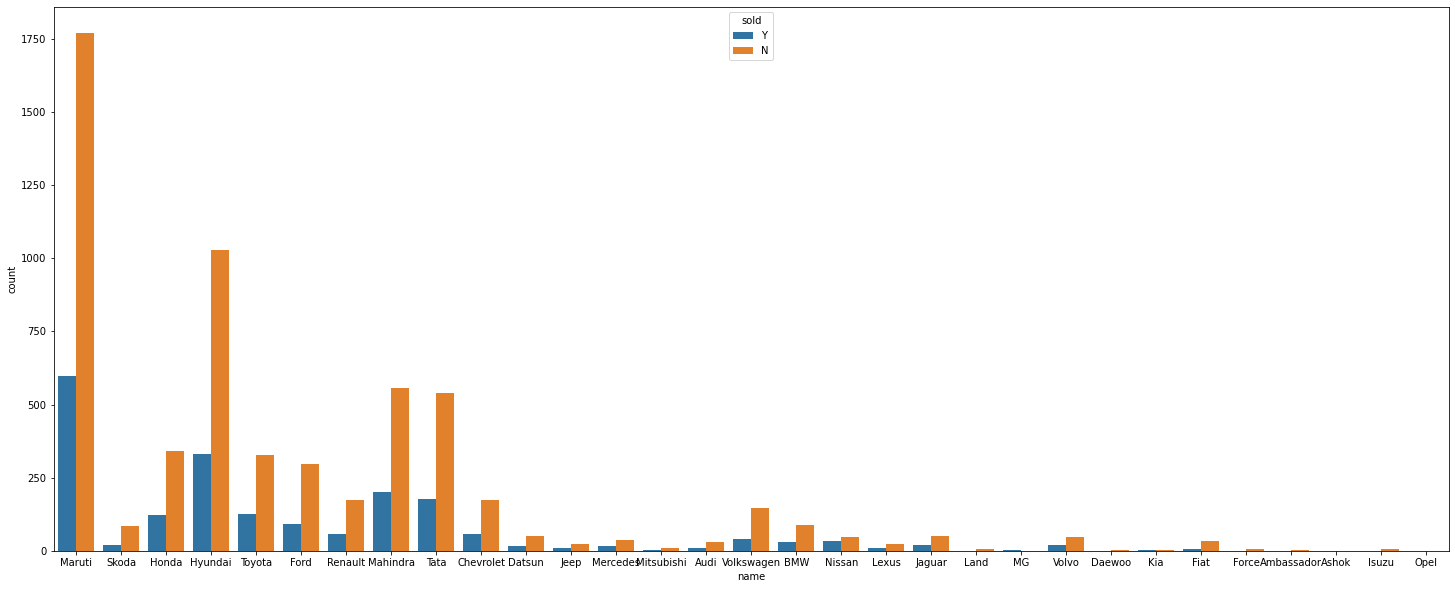

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(data=df, x="name", hue="sold")

#### Number of cars sold of Maruti are much more than any other brand

<AxesSubplot:xlabel='year', ylabel='count'>

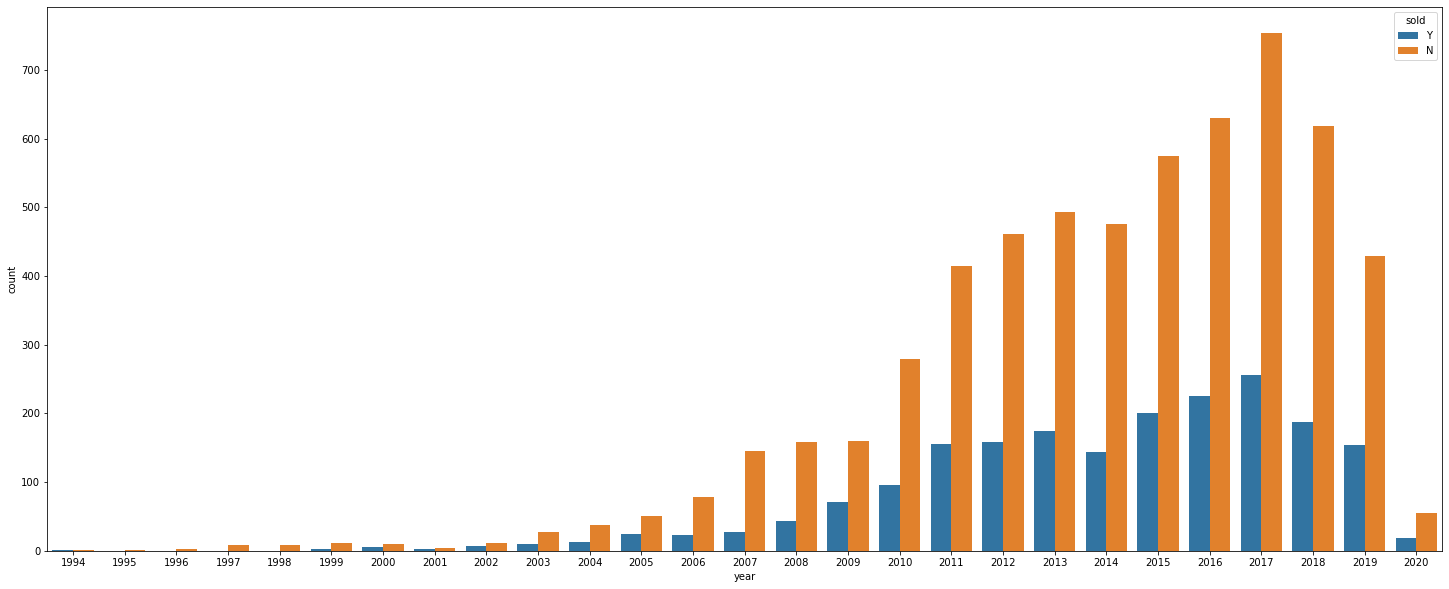

In [17]:
plt.figure(figsize=(25,10))
sns.countplot(data=df, x="year", hue="sold")

#### Most number of cars are sold in the year 2017
#### Clearly we can see the growth in the number of cars over the years till 2017 and then gradually going down

<AxesSubplot:xlabel='Region', ylabel='count'>

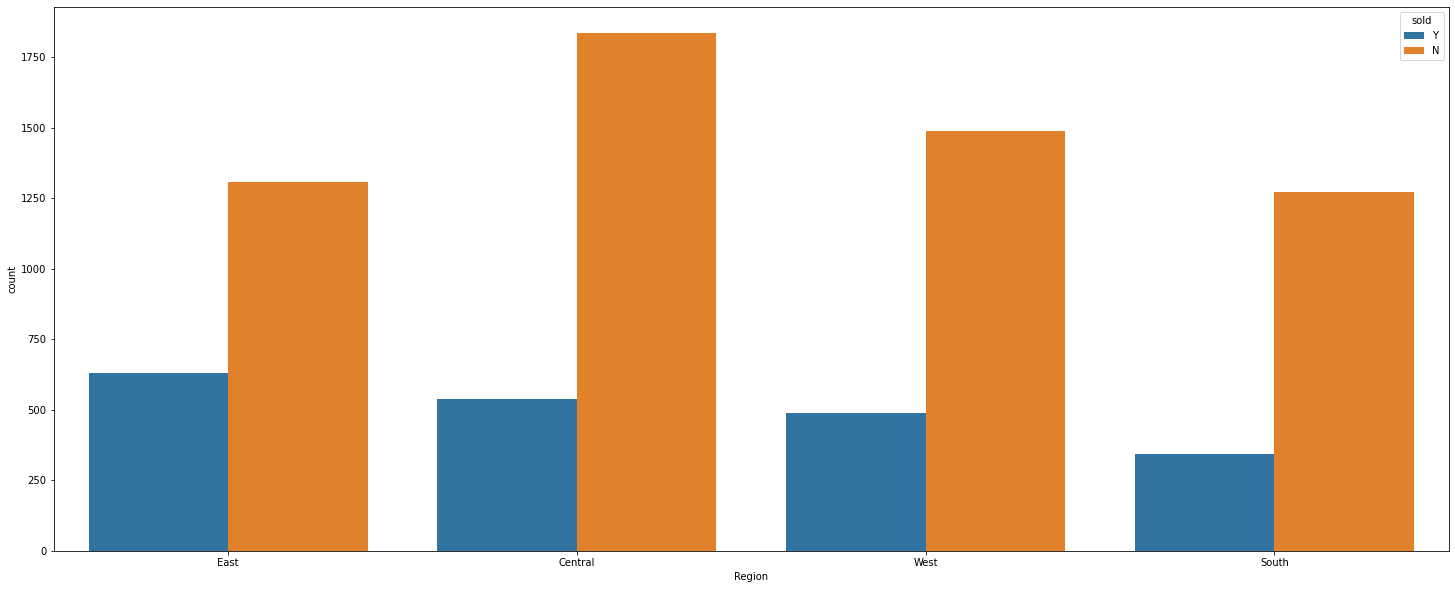

In [18]:
plt.figure(figsize=(25,10))
sns.countplot(data=df, x="Region", hue="sold")

#### East is the region where most cars are sold 

<AxesSubplot:xlabel='State or Province', ylabel='count'>

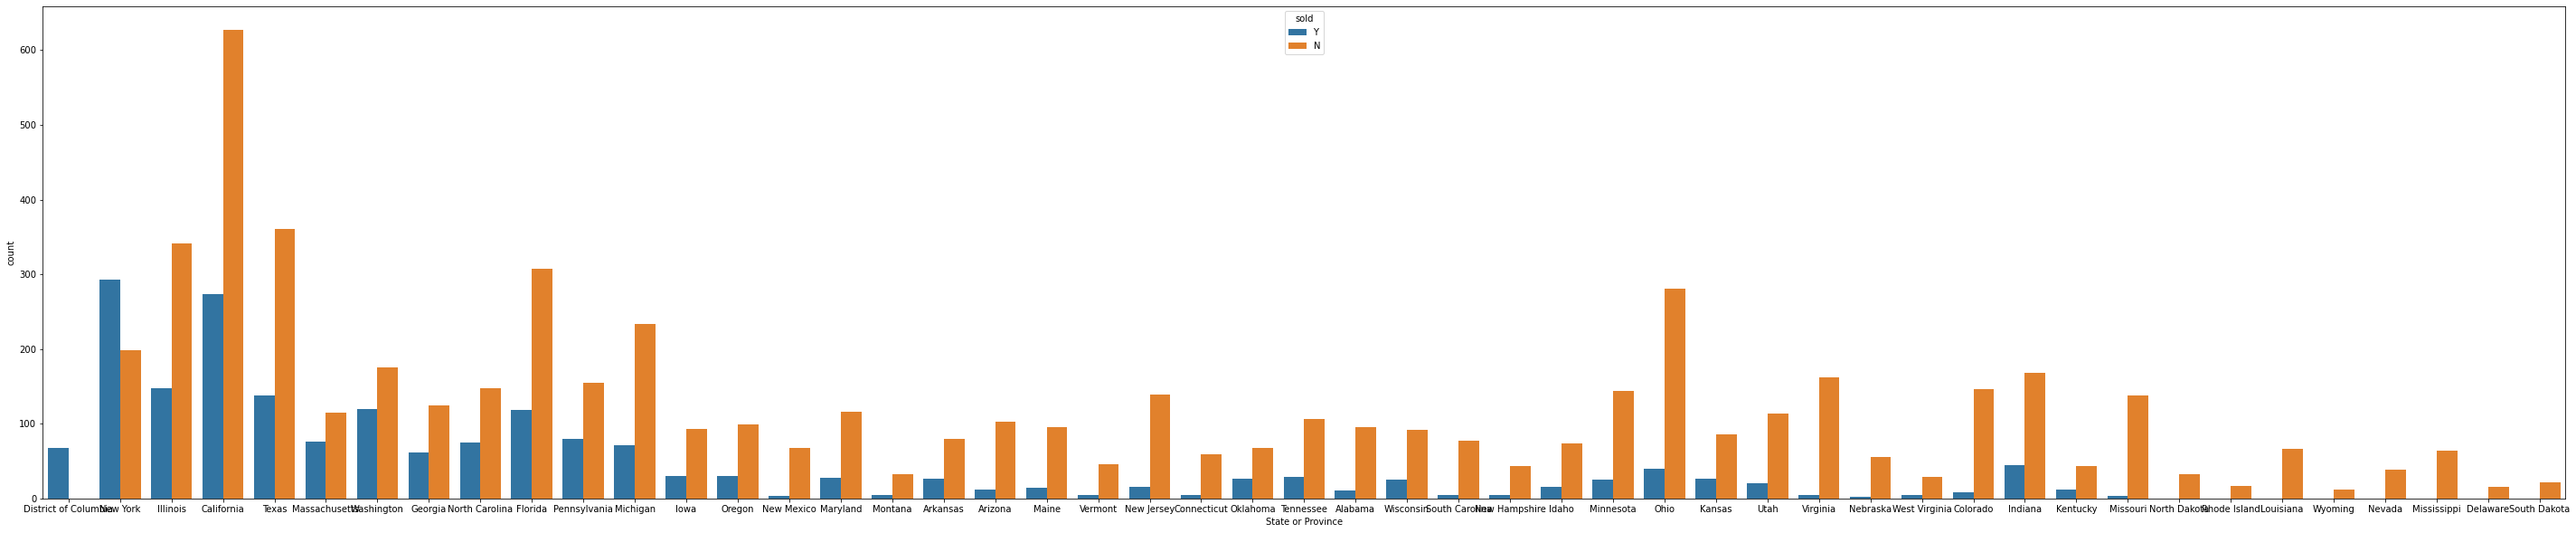

In [19]:
plt.figure(figsize=(50,10))
sns.countplot(data=df, x="State or Province", hue="sold")

#### In New York most number of cars are sold and the next state is California

<AxesSubplot:xlabel='fuel', ylabel='count'>

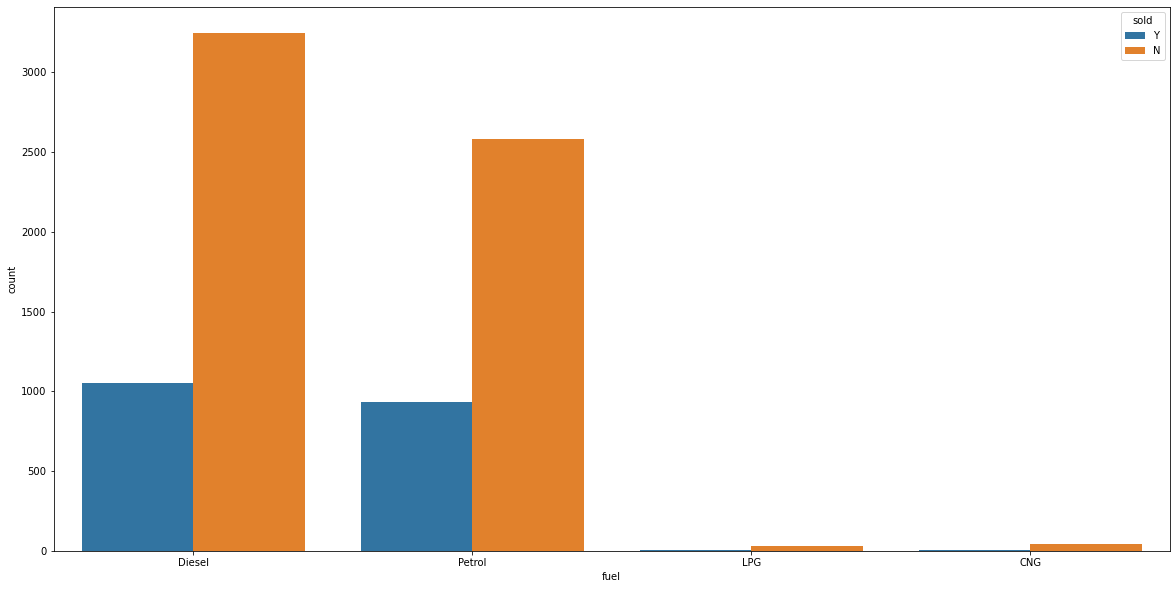

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="fuel", hue="sold")

#### Majority of cars sold are of fuel type Diesel and Petrol

<AxesSubplot:xlabel='seller_type', ylabel='count'>

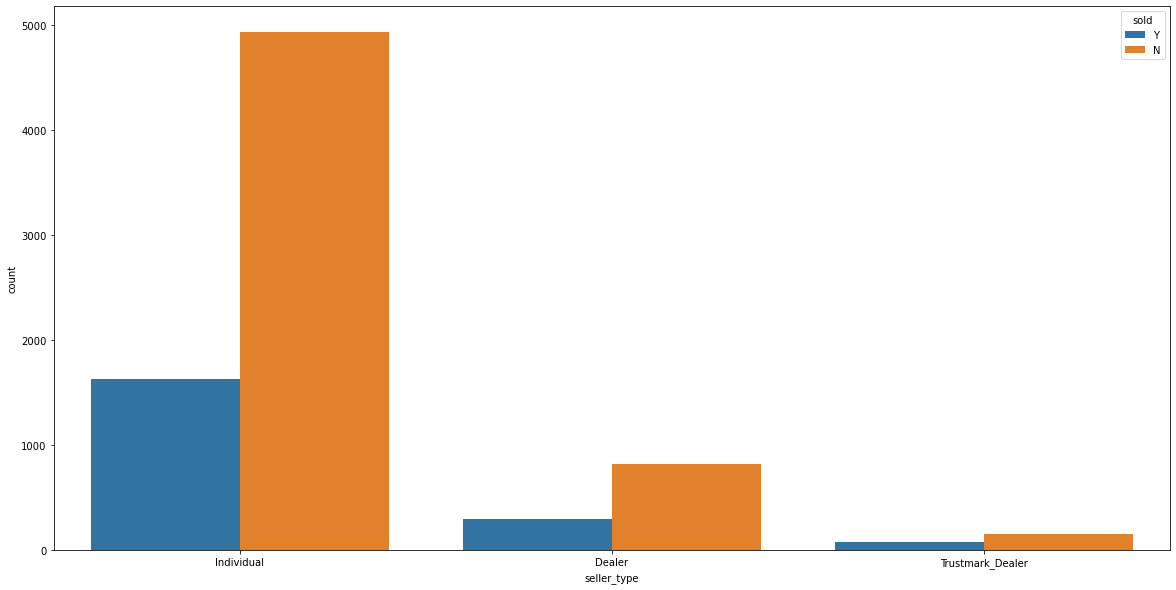

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="seller_type", hue="sold")

#### Most of the cars are sold by Individual

<AxesSubplot:xlabel='transmission', ylabel='count'>

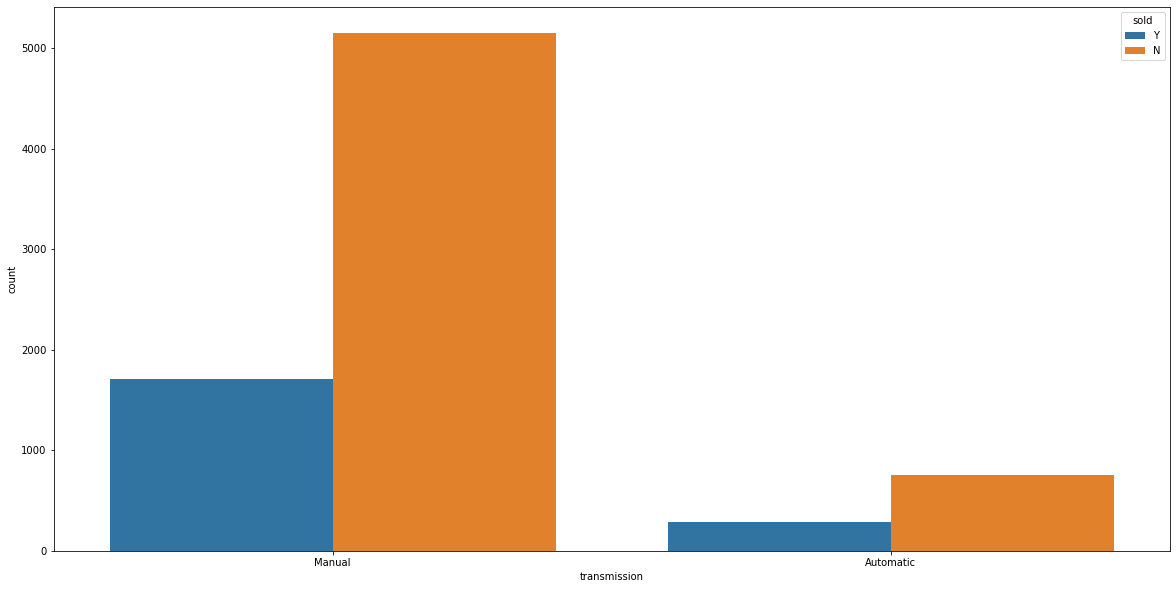

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="transmission", hue="sold")

#### Cars of manual transmission are sold more as compared to automatic transmission

<AxesSubplot:xlabel='owner', ylabel='count'>

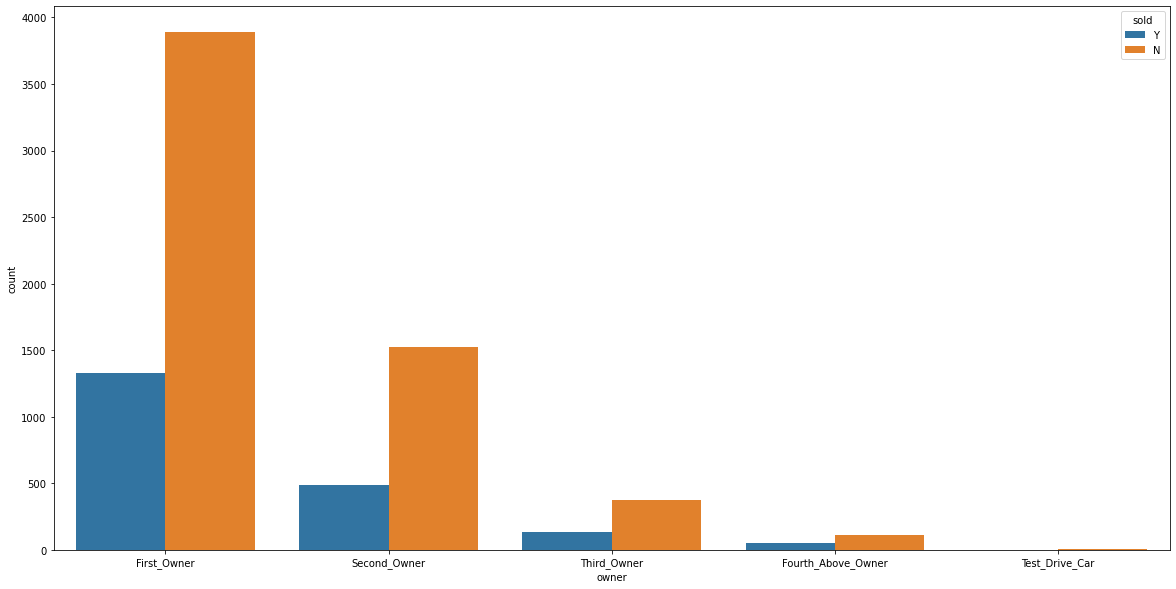

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="owner", hue="sold")

#### Cars used by only one owner are prefered for buying than used by more owners

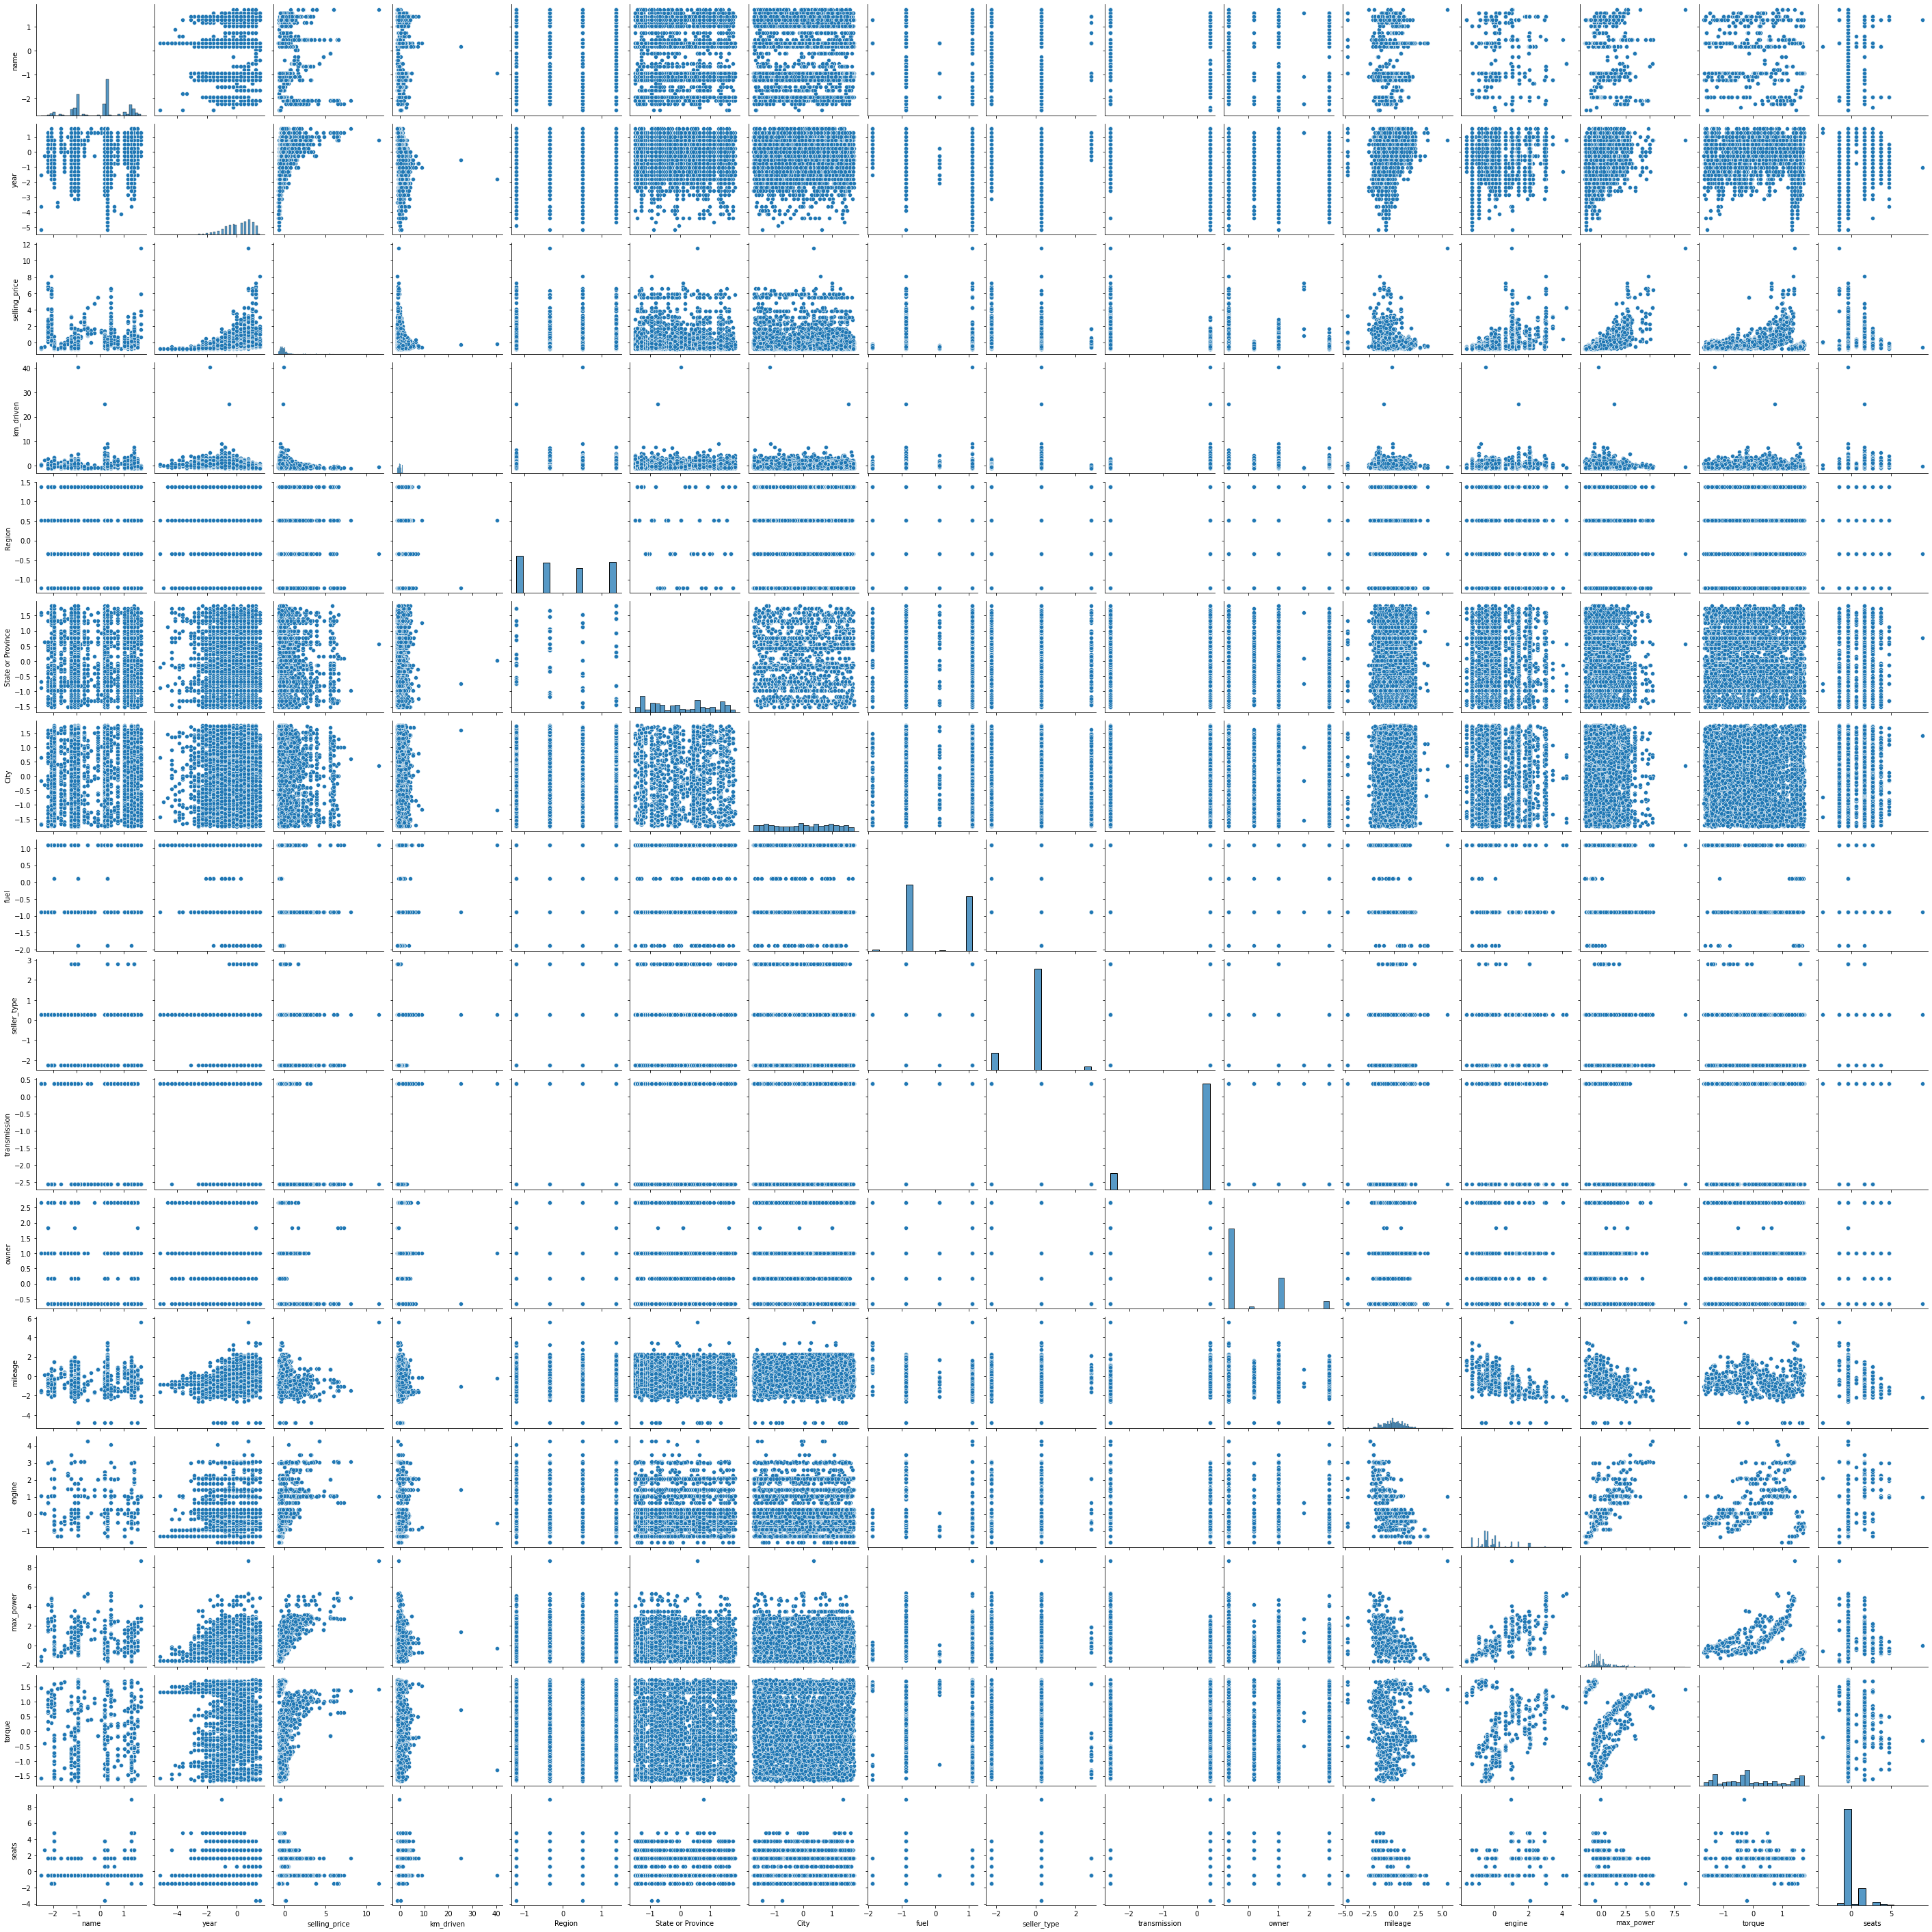

In [24]:
sns.pairplot(df1)

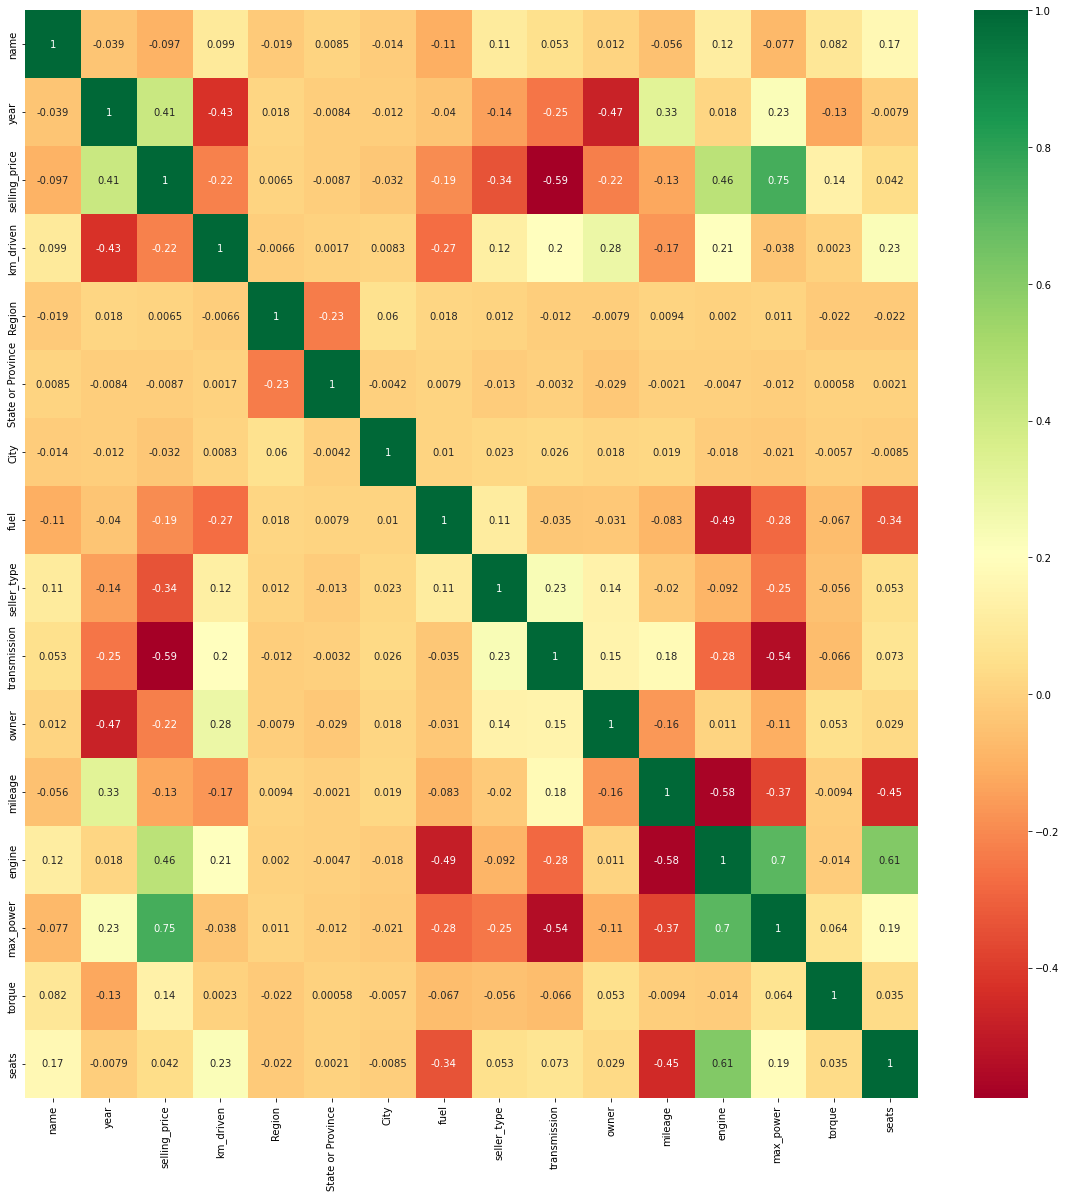

In [25]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Checking feature importance

In [26]:
x = df1.iloc[ : , : ]

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[0.02650639 0.03197102 0.02974099 0.03550138 0.05587063 0.23324301
 0.41777271 0.01061671 0.02650867 0.00864308 0.0186896  0.02835114
 0.01892794 0.0231666  0.02179025 0.01269989]


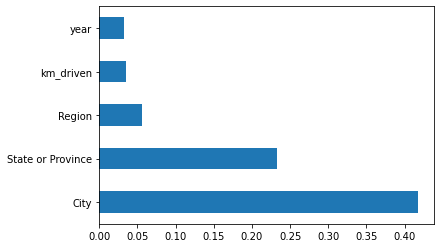

In [29]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#### Features shown is above graph are the top 5 features from the dataset 

# XGBoost Classifier

In [30]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score,precision_score,recall_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('Roc auc score:', roc_auc_score(xgb_y_predict, y_test))
print('F1 score:',f1_score(xgb_y_predict, y_test))
print('Precision score:',precision_score(xgb_y_predict, y_test))
print('Recall score:',recall_score(xgb_y_predict, y_test))

Accuracy score is: 0.8836915297092288
Roc auc score: 0.879801294915729
F1 score: 0.758530183727034
Precision score: 0.6705336426914154
Recall score: 0.8731117824773413


In [31]:
confusion_matrix(xgb_y_predict, y_test)

array([[1109,  142],
       [  42,  289]], dtype=int64)

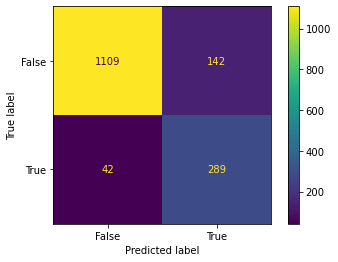

In [32]:
confusion_matrix = metrics.confusion_matrix(xgb_y_predict, y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

#### The confusion matrix that we can see here has predicted values on x axis and true values on y axis so from this we can infer how many values are correctly predicted and values that are wrongly predictedd.

#### In the first quadrant we have values that are predicted as N by our model so from first quadrant we get information that 1109 values are predicted as N by our model which has true values as N this are also called are True Negatives
#### In second quadrant we have values that are actually N but predicted Y this are also called False Positives we have 142 False Positives
#### In third quadrant we have values thar are actually Y but predicted N this are also called False Negatives we have 42 False Negatives
#### In fourth quadrant we have values that are predicted Y and are actually Y this are also called True Positives we have 289 True Positives

#### Precision score measures the proportion of positively predicted labels that are actually correct. Precision is also known as the positive predictive value. The precision score is a useful measure of the success of prediction when the classes are very imbalanced. Mathematically, it represents the ratio of true positive to the sum of true positive and false positive.

#### Precision Score = TP / (FP + TP)

#### Recall score represents the model’s ability to correctly predict the positives out of actual positives. This is unlike precision which measures how many predictions made by models are actually positive out of all positive predictions made. Mathematically, it represents the ratio of true positive to the sum of true positive and false negative.

#### Recall Score = TP / (FN + TP)

#### Model accuracy is a machine learning classification model performance metric that is defined as the ratio of true positives and true negatives to all positive and negative observations. In other words, accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions. Recall score can be used in the scenario where the labels are not equally divided among classes. For example, if there is a class imbalance ratio of 20:80 (imbalanced data), then the recall score will be more useful than accuracy because it can provide information about how well the machine learning model identified rarer events.

#### Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

#### Model F1 score represents the model score as a function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations). 

#### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

#### ROCAUC score :- The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

## As we can see the above data is imbalanced because there are 5906 values as 0 and only 2000 values as 1
## To make the dataset balanced we can use random under sampling or random over sampling 

# Random Under Sampling

In [33]:
from imblearn.under_sampling import NearMiss
from collections import Counter

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 5906, 1: 2000})
Resample dataset shape: Counter({0: 2000, 1: 2000})


In [34]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))
print('Precision score:',precision_score(y_test1, predict_y))
print('Recall score:',recall_score(y_test1, predict_y))

ROCAUC score: 0.8796358985932446
Accuracy score: 0.88
F1 score: 0.8730158730158731
Precision score: 0.873015873015873
Recall score: 0.873015873015873


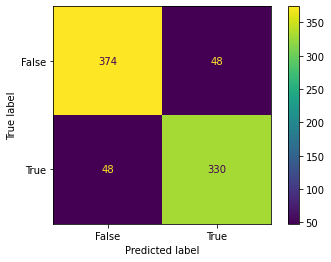

In [35]:
confusion_matrix = metrics.confusion_matrix(predict_y, y_test1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### After using random under sampling we can see a significant increase in F1 score and Precision score

# Random Over Sampling

In [36]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_over))

Original dataset shape: Counter({0: 5906, 1: 2000})
Resample dataset shape: Counter({1: 5906, 0: 5906})


In [37]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_over, y_over, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train2, y_train2)
predict_y2 = m.predict(x_test2)

print('ROCAUC score:',roc_auc_score(y_test2, predict_y2))
print('Accuracy score:',accuracy_score(y_test2, predict_y2))
print('F1 score:',f1_score(y_test2, predict_y2))
print('Precision score:',precision_score(y_test2, predict_y2))
print('Recall score:',recall_score(y_test2, predict_y2))

ROCAUC score: 0.9518402648926918
Accuracy score: 0.9517562420651714
F1 score: 0.9521008403361345
Precision score: 0.939469320066335
Recall score: 0.965076660988075


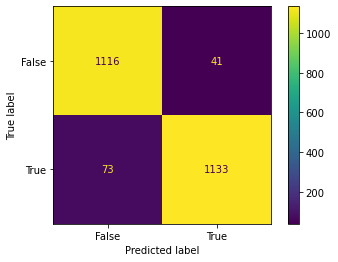

In [38]:
confusion_matrix = metrics.confusion_matrix(predict_y2, y_test2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### After doing random over sampling there is a significant increase in the ROCAUC score, Accuracy score, F1 score, Precision score and Recall score
### Thus we can conclude that due to random over sampling our model performs better with an Accuracy score of 96.31%

In [68]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [69]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [70]:
random_search=RandomizedSearchCV(m,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [71]:
random_search.fit(x_over,y_over)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [72]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [74]:
random_search.best_score_

0.976152232382599

### After hypertuning we got the score of 97.61% 
### Thus we can conclude that due to random over sampling and hypertuning our model performs better with an Accuracy score of 97.61%


# KNeighbors Classifier

In [66]:
#import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()

In [67]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_over,y_over)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8378810643769687
Best Parameters: {'n_neighbors': 1}


### The best score that we got from KNeighbors Classifier is 83.78%

# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

In [43]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [44]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [58]:
grid_search.fit(x_train2, y_train2)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [59]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [60]:
grid_search.best_score_

0.9122663715916742

### The best score that we got from Decision Tree Classifier is 91.22%

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,x_over,y_over,scoring='accuracy',cv=10))

0.6768390090705775

In [65]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_over, y_over)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.758449 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}


### The best score that we got from Adaboost Classifier is 75.84%

# Our model performs best with XGBoost Classifier